C:\Users\Master18\AppData\Local\Temp\ipykernel_1016\759810375.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


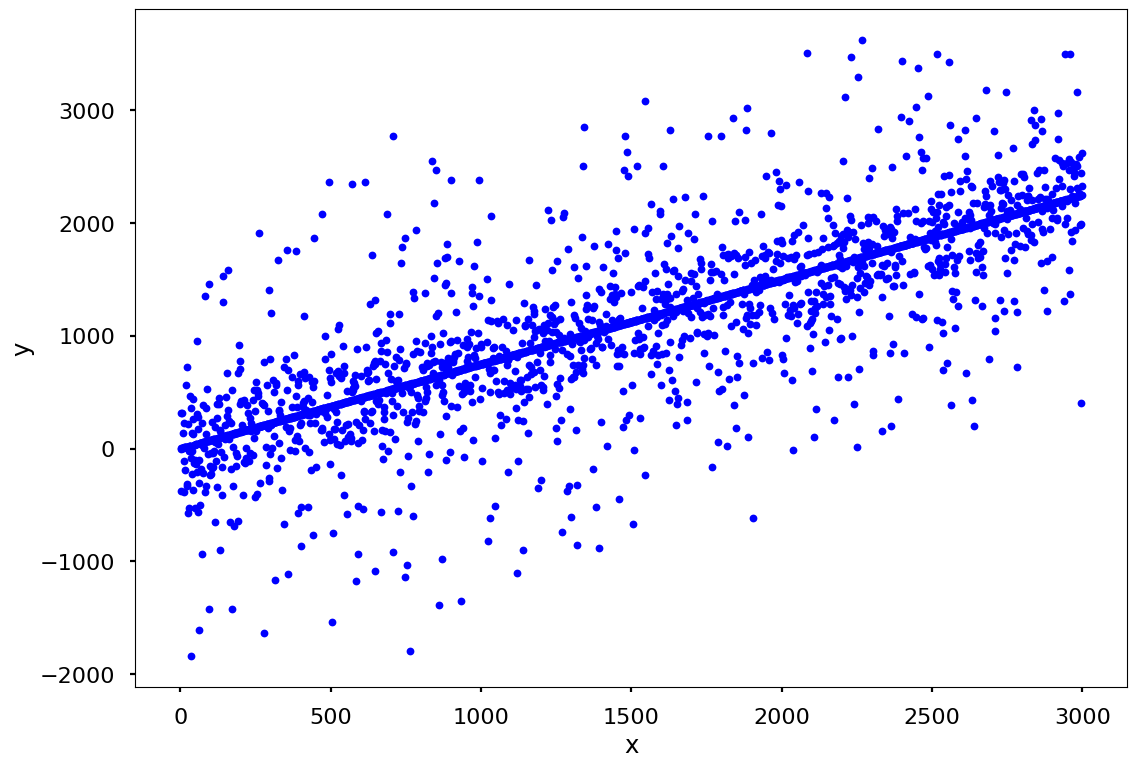

In [22]:
# Firstly generate noisy line data
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
from numpy.random import randint
import random

plt.style.use('seaborn-poster')

n = 3000

random.seed(5)

x = np.linspace(1, n, n)
o = []
for i in range(n):
    o.append(random.randint(0,n))
y = []
for i in range(0, n):
    y.append( (0.75 * x[i] + (random.choice(range(int(-n/8), int(n/8))) if o[i] < n/2 else 0)
                            + (random.choice(range(int(-n/4), int(n/4))) if o[i] < n/4 else 0)
                            + (random.choice(range(int(-n/2), int(n/2))) if o[i] < n/8 else 0)
        ))

plt.plot(x, y, 'b.')
#plt.plot(x, o, 'r.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [23]:
### HW 4: Implementation of hough transform alg

H = [] # accumulator array

THETA_LEN = 180
RO_LEN = 180

for t in range(THETA_LEN):
    H.append([])
    for r in range(RO_LEN):
        H[t].append(0)
        
# Check that accumulator array correctly filled with zeros
print(H)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

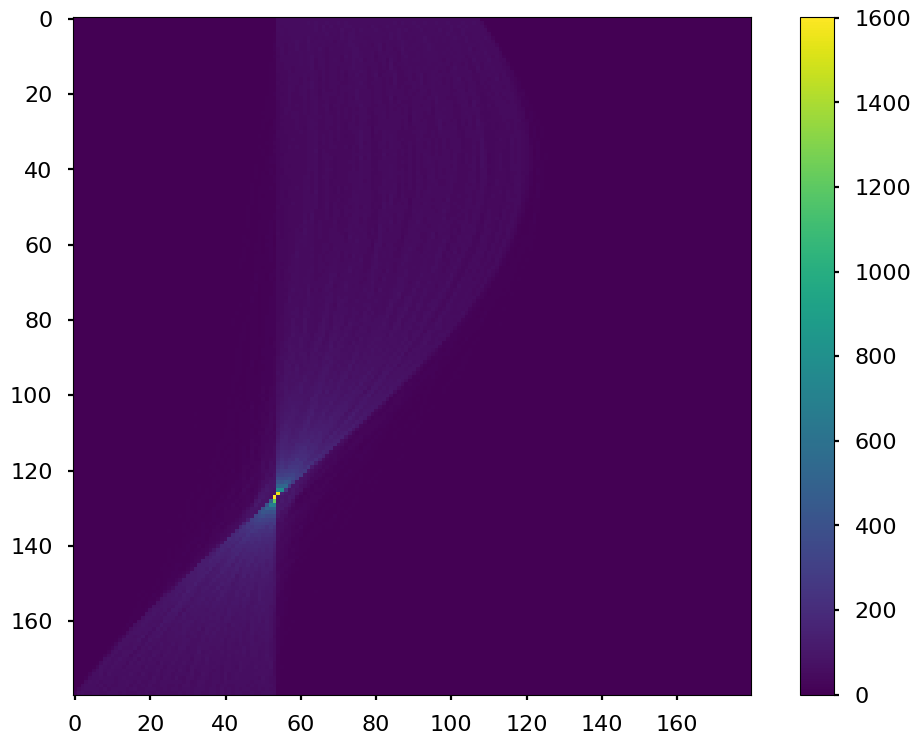

In [24]:
import math

SHIFT = n # shift to avoid negative indexes in array

for p in range(0, n):
    # Looking at point with number p
    for theta in range(0, THETA_LEN):
        # convert theta to rad
        theta_rad = (theta / 180.0) * math.pi
        ro = x[p] * math.cos(theta_rad) + y[p] * math.sin(theta_rad)
        ro = ro + SHIFT # avoid negative index of array!
        # max value of ro - 10k, min - 0
        ro = (ro / 10000.0) * RO_LEN
        H[int(theta)][int(ro)] = H[int(theta)][int(ro)] + 1
        
result = np.array(H)
plt.imshow(result, interpolation="nearest", origin="upper")
plt.colorbar()
plt.show()

1602 127 53 2.2165681500327987


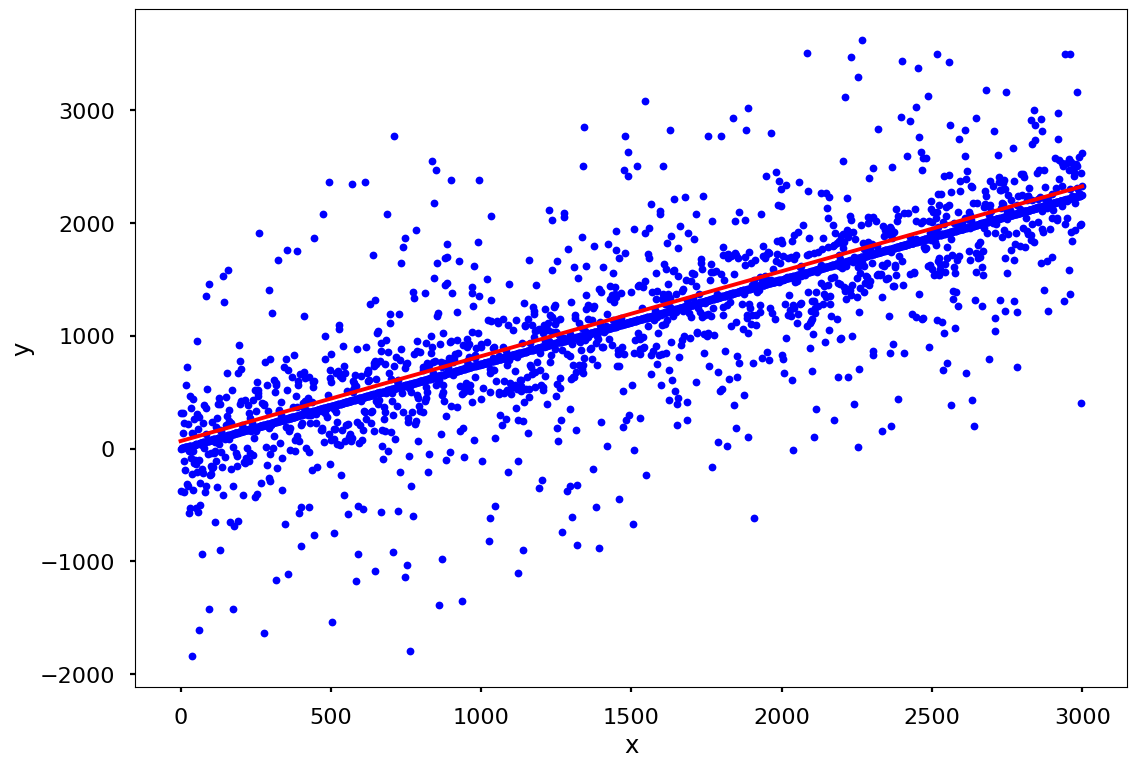

In [25]:
# Next step of algorythm - find values of (theta, ro) 
# where H(theta, ro) is a local maximum.
# But I can search only one global maximum, because there is
# only one line to detect.

max_val = 0
max_r = 0
max_t = 0
for t in range(0, THETA_LEN):
    for r in range(0, RO_LEN):
        if H[t][r] > max_val:
            max_t = t
            max_r = r
            max_val = H[t][r]
            
# found theta and ro for line
# ro = x*cos(theta) + y*sin(theta)

max_rad_t = (max_t / 180.0) * math.pi

print(max_val, max_t, max_r, max_rad_t)

plt.plot(x, y, 'b.')
plt.plot( (max_r - x * math.cos(max_rad_t)) / math.sin(max_rad_t), 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

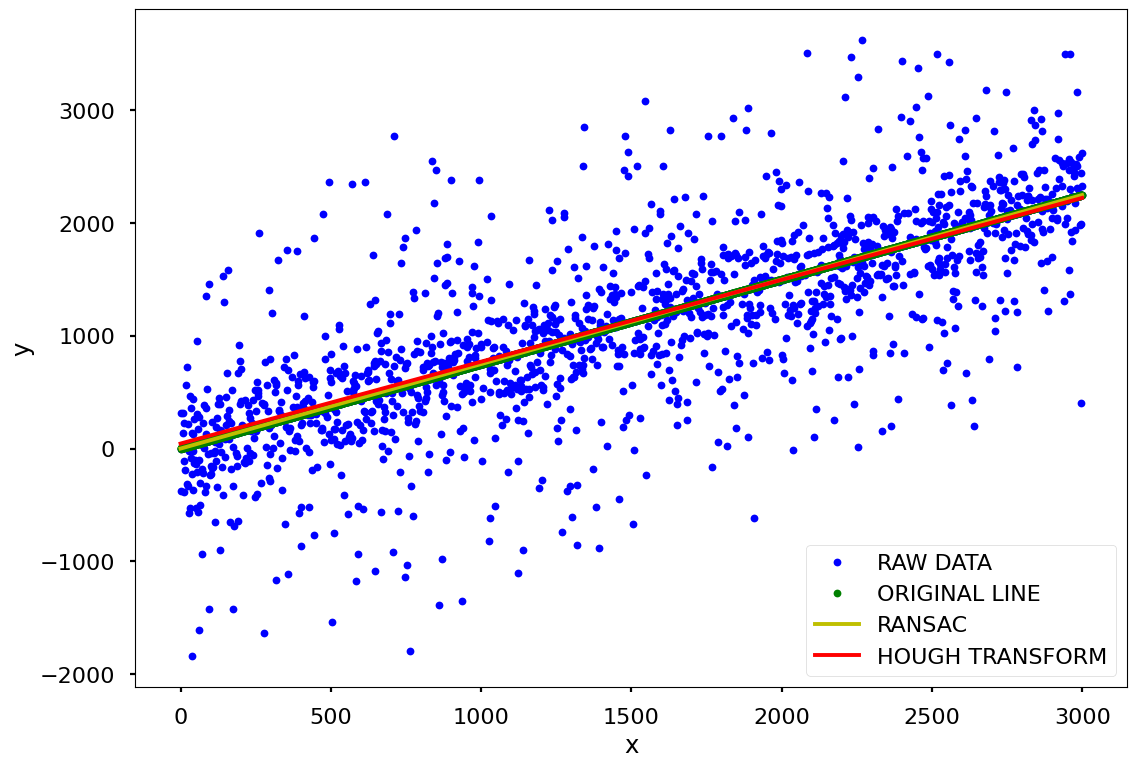

In [21]:
### COMPARE HOUGH TRANSFORM WITH RANSAC

## RANSAC implementation (HW 3)
def get_line(x1, y1, x2, y2):
    k = (y1 - y2) / (x1 - x2)
    b = y2 - k*x2
    return k, b

mx = 0
best_k = 0
best_b = 0
for i in range(100):
    j = random.randint(0, n-1)
    g = random.randint(0, n-1)
    if j==g:
        continue
    k, b = get_line(x[j], y[j], x[g], y[g])
    a = 0
    for h in range(n):
        xh = x[h]
        yh = y[h]
        if yh <= k*xh + b + 3 and yh >= k*xh + b - 3:
            a = a + 1
    if a > mx:
        best_k = k
        best_b = b
        mx = a
        
plt.plot(x, y, 'b.', label="RAW DATA")
plt.plot(0.75 * x, 'g.', label="ORIGINAL LINE")
plt.plot(best_k * x + best_b, 'y', label="RANSAC")
plt.plot( (max_r - x * math.cos(max_rad_t)) / math.sin(max_rad_t), 'r', label="HOUGH TRANSFORM")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()